In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam

from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split

## データの読み込み，整形

In [3]:
# 生データの読み込み
data = pd.read_csv('./dataset/log-2020-02-20-13-54-32.csv',
                   index_col=0)
print(data.shape)
data.head()

(2442, 4)


,acceleration_x,acceleration_y,acceleration_z,time
0,-108.0,119.0,870.0,0.000000
1,-106.0,110.0,865.0,0.176580
2,-109.0,125.0,863.0,0.345388
3,-111.0,118.0,863.0,0.499721
4,-110.0,116.0,862.0,0.655409


In [4]:
# 各状態のデータに切り分け(timeは除外)
sitting = data.iloc[:110, :3]
walking = data.iloc[120:240, :3]
running = data.iloc[240:360, :3]
behaviors = {'sitting': sitting,
             'walking': walking,
             'running': running}

In [8]:
# ラベル付けして一つのデータにまとめる
for k, v in behaviors.items():
    v['class'] = k
merged_data = pd.concat([sitting, walking, running])

# 現状だと立ち上がり時[110:120]を除外しているのでindexを振り直す
merged_data = merged_data.reset_index(drop=True)

print(merged_data.shape)
merged_data.head()

(350, 4)


,acceleration_x,acceleration_y,acceleration_z,class
0,-108.0,119.0,870.0,sitting
1,-106.0,110.0,865.0,sitting
2,-109.0,125.0,863.0,sitting
3,-111.0,118.0,863.0,sitting
4,-110.0,116.0,862.0,sitting


## 前処理

In [24]:
sensor_data = merged_data.iloc[:, :3]  # classは除外
row, col = sensor_data.shape
X = np.zeros((row, col))
for i in range(row):
    X[i] = list(sensor_data.loc[i])

# 特徴量の標準化
ss = preprocessing.StandardScaler()
X_standardization = ss.fit_transform(X)
X_standardization[:5]

array([[1.06086813, 1.19895989, 1.97787953],
       [1.21245165, 0.68741666, 0.99399972],
       [0.98507637, 1.53998871, 0.60044779],
       [0.83349284, 1.14212175, 0.60044779],
       [0.9092846 , 1.02844548, 0.40367183]])

In [39]:
label = merged_data['class']
y = pd.get_dummies(label)  # one-hot vectorに変換
y = np.array(y)

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

## モデルの構築

In [50]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(3,)))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

## 学習

In [55]:
batch_size = 16
num_classes = 3
epochs = 100

In [75]:
# データセットの分割
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                    train_size=0.8, test_size=0.2)

model = build_model()
history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/100
280/280 [==============================] - 0s 1ms/step - loss: 32.2494 - accuracy: 0.3500
Epoch 2/100
280/280 [==============================] - 0s 196us/step - loss: 8.9783 - accuracy: 0.1786
Epoch 3/100
280/280 [==============================] - 0s 140us/step - loss: 4.6633 - accuracy: 0.2464
Epoch 4/100
280/280 [==============================] - 0s 186us/step - loss: 3.7171 - accuracy: 0.2500
Epoch 5/100
280/280 [==============================] - 0s 175us/step - loss: 3.0419 - accuracy: 0.2571
Epoch 6/100
280/280 [==============================] - 0s 179us/step - loss: 2.8322 - accuracy: 0.3036
Epoch 7/100
280/280 [==============================] - 0s 165us/step - loss: 2.0786 - accuracy: 0.3857
Epoch 8/100
280/280 [==============================] - 0s 171us/step - loss: 1.9893 - accuracy: 0.4750
Epoch 9/100
280/280 [==============================] - 0s 142us/step - loss: 1.5812 - accuracy: 0.5286
Epoch 10/100
280/280 [==============================] - 0s 164us/step - lo

280/280 [==============================] - 0s 167us/step - loss: 0.5058 - accuracy: 0.8286
Epoch 80/100
280/280 [==============================] - 0s 196us/step - loss: 0.4144 - accuracy: 0.8357
Epoch 81/100
280/280 [==============================] - 0s 164us/step - loss: 0.3788 - accuracy: 0.8321
Epoch 82/100
280/280 [==============================] - 0s 153us/step - loss: 0.3929 - accuracy: 0.8357
Epoch 83/100
280/280 [==============================] - 0s 181us/step - loss: 0.4331 - accuracy: 0.8250
Epoch 84/100
280/280 [==============================] - 0s 186us/step - loss: 0.4561 - accuracy: 0.8071
Epoch 85/100
280/280 [==============================] - 0s 200us/step - loss: 0.3920 - accuracy: 0.8571
Epoch 86/100
280/280 [==============================] - 0s 196us/step - loss: 0.3430 - accuracy: 0.8536
Epoch 87/100
280/280 [==============================] - 0s 162us/step - loss: 0.3846 - accuracy: 0.8107
Epoch 88/100
280/280 [==============================] - 0s 128us/step - loss:

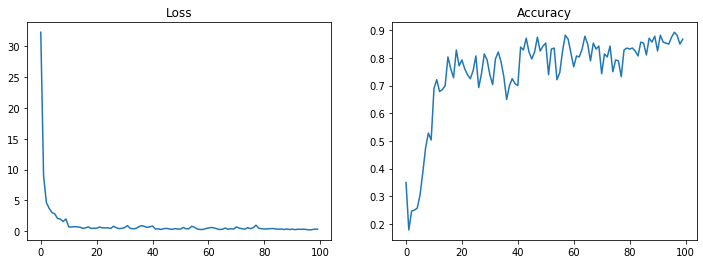

In [79]:
loss = history.history['loss']
acc = history.history['accuracy']

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(loss)
plt.title('Loss')

plt.subplot(122)
plt.plot(acc)
plt.title('Accuracy')

plt.show()

In [77]:
# テストに対する精度の評価
score = model.evaluate(test_x, test_y)
print(score)

70/70 [==============================] - 0s 3ms/step
[0.13046020131025995, 0.9428571462631226]


In [80]:
import os

# モデルの保存
save_path = './models/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)
model.save(os.path.join(save_path, 'NN64.h5'))

## k分割交差検証
ログを取ったデータの絶対数が少ないので，k分割交差検証を行う．  
データの偏りが大きく，不均衡な場合は層化抽出法(目的変数の割合が元のデータと同じになるようにする手法)を用いる
．

In [62]:
# 無作為抽出法(random)を用いたk分割交差検証
kf = KFold(n_splits=3, shuffle=True)
cv_scores = []

for train_idx, val_idx in kf.split(X, y):
    # 各データを用意
    train_data = X[train_idx]
    train_label = y[train_idx]
    val_data = X[val_idx]
    val_label = y[val_idx]
    
    model = build_model()
    history = model.fit(train_data, train_label,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1)
    
    # 評価
    scores = model.evaluate(val_data, val_label,
                            verbose=1)
    print('/'*20)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print('/'*20)
    cv_scores.append(scores[1] * 100)
    
# 全体としての精度を確認
print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_scores), np.std(cv_scores)))

Epoch 1/100
233/233 [==============================] - 0s 1ms/step - loss: 46.3884 - accuracy: 0.3433
Epoch 2/100
233/233 [==============================] - 0s 155us/step - loss: 9.9555 - accuracy: 0.3090
Epoch 3/100
233/233 [==============================] - 0s 150us/step - loss: 4.0352 - accuracy: 0.2790
Epoch 4/100
233/233 [==============================] - 0s 152us/step - loss: 2.9073 - accuracy: 0.1760
Epoch 5/100
233/233 [==============================] - 0s 206us/step - loss: 1.8113 - accuracy: 0.2747
Epoch 6/100
233/233 [==============================] - 0s 140us/step - loss: 1.4946 - accuracy: 0.2275
Epoch 7/100
233/233 [==============================] - 0s 198us/step - loss: 1.3891 - accuracy: 0.3133
Epoch 8/100
233/233 [==============================] - 0s 192us/step - loss: 1.1919 - accuracy: 0.3820
Epoch 9/100
233/233 [==============================] - 0s 190us/step - loss: 1.2507 - accuracy: 0.3948
Epoch 10/100
233/233 [==============================] - 0s 188us/step - lo

233/233 [==============================] - 0s 127us/step - loss: 0.3305 - accuracy: 0.8627
Epoch 80/100
233/233 [==============================] - 0s 169us/step - loss: 0.3916 - accuracy: 0.8240
Epoch 81/100
233/233 [==============================] - 0s 143us/step - loss: 0.3003 - accuracy: 0.8712
Epoch 82/100
233/233 [==============================] - 0s 147us/step - loss: 0.3989 - accuracy: 0.8112
Epoch 83/100
233/233 [==============================] - 0s 151us/step - loss: 0.3874 - accuracy: 0.8326
Epoch 84/100
233/233 [==============================] - 0s 100us/step - loss: 0.3962 - accuracy: 0.8155
Epoch 85/100
233/233 [==============================] - 0s 211us/step - loss: 0.3334 - accuracy: 0.8326
Epoch 86/100
233/233 [==============================] - 0s 158us/step - loss: 0.3017 - accuracy: 0.8670
Epoch 87/100
233/233 [==============================] - 0s 164us/step - loss: 0.3306 - accuracy: 0.8584
Epoch 88/100
233/233 [==============================] - 0s 167us/step - loss:

233/233 [==============================] - 0s 143us/step - loss: 0.3227 - accuracy: 0.8670
Epoch 57/100
233/233 [==============================] - 0s 168us/step - loss: 0.6325 - accuracy: 0.7253
Epoch 58/100
233/233 [==============================] - 0s 156us/step - loss: 0.4966 - accuracy: 0.7554
Epoch 59/100
233/233 [==============================] - 0s 172us/step - loss: 0.3949 - accuracy: 0.8240
Epoch 60/100
233/233 [==============================] - 0s 198us/step - loss: 0.3816 - accuracy: 0.8197
Epoch 61/100
233/233 [==============================] - 0s 168us/step - loss: 0.3531 - accuracy: 0.8498
Epoch 62/100
233/233 [==============================] - 0s 178us/step - loss: 0.3809 - accuracy: 0.8326
Epoch 63/100
233/233 [==============================] - 0s 158us/step - loss: 0.3671 - accuracy: 0.8541
Epoch 64/100
233/233 [==============================] - 0s 140us/step - loss: 0.4002 - accuracy: 0.8155
Epoch 65/100
233/233 [==============================] - 0s 193us/step - loss:

234/234 [==============================] - 0s 115us/step - loss: 0.4242 - accuracy: 0.8077
Epoch 34/100
234/234 [==============================] - 0s 190us/step - loss: 0.4433 - accuracy: 0.7692
Epoch 35/100
234/234 [==============================] - 0s 140us/step - loss: 0.4343 - accuracy: 0.7991
Epoch 36/100
234/234 [==============================] - 0s 160us/step - loss: 0.4265 - accuracy: 0.7991
Epoch 37/100
234/234 [==============================] - 0s 132us/step - loss: 0.4838 - accuracy: 0.7991
Epoch 38/100
234/234 [==============================] - 0s 175us/step - loss: 0.3926 - accuracy: 0.8419
Epoch 39/100
234/234 [==============================] - 0s 210us/step - loss: 0.3234 - accuracy: 0.8974
Epoch 40/100
234/234 [==============================] - 0s 170us/step - loss: 0.3870 - accuracy: 0.8803
Epoch 41/100
234/234 [==============================] - 0s 163us/step - loss: 0.3518 - accuracy: 0.8248
Epoch 42/100
234/234 [==============================] - 0s 210us/step - loss: